EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# 데이터 불러오기
#train_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/WASSUP/project/train_modified.csv')
train_data = pd.read_csv('/content/Dianosis_train1.csv')

In [15]:
# 데이터 간략하게 확인하기
train_data.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,Male,Asian,Stable,No,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,Male,Hispanic,Stable,No,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,Female,Black,Unstable,No,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,Female,Black,Stable,Yes,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,Male,White,Stable,Yes,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [16]:
train_data.describe()

,Diagnosis,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9516.000000,10000.000000,9461.000000,10000.000000,10000.000000,10000.000000,9799.000000
mean,0.503600,6.485137,7.339722,7.019229,5.495094,5.004880,5.684392,6.507784,4.660375,2.639820,2.769270,3.979344,4.875879,4.892598,2.503921,6.248728
std,0.500012,1.111695,1.135760,0.995286,1.121692,0.995302,1.889586,1.110032,1.103300,1.078949,1.084593,1.130747,0.977009,1.695571,0.985240,2.268198
min,0.000000,2.361254,3.007422,3.104940,1.152386,1.629374,0.457384,1.844317,0.848507,1.000022,1.000629,1.015541,1.039531,1.003486,1.000238,0.502300
25%,0.000000,5.723042,6.556735,6.350163,4.738076,4.336195,4.246898,5.752434,3.915314,1.748510,1.917813,3.179104,4.225069,3.528066,1.707915,4.448838
50%,1.000000,6.467649,7.355944,7.021443,5.487237,5.003497,5.340179,6.509457,4.686469,2.477999,2.642702,3.983952,4.906347,5.479616,2.372742,6.330896
75%,1.000000,7.248700,8.139588,7.696230,6.254233,5.686767,7.282476,7.276955,5.426938,3.411670,3.486268,4.779751,5.577368,6.266723,3.164034,8.209953
max,1.000000,9.939766,9.996840,9.982799,9.359651,8.737019,9.999307,9.857221,8.773658,6.971974,6.928617,6.996624,6.999574,6.999820,6.494824,9.999722


In [17]:
# 결측치 확인
train_data.isna().sum()

Diagnosis           0
Sex                 0
Race                0
Housing             0
Delay               0
Anhedonia           0
DepMood             0
Sleep               0
Tired               0
Appetite            0
Rumination          0
Concentration       0
Psychomotor         0
Delusion          484
Suspicious          0
Withdrawal        539
Passive             0
Tension             0
UnusualThought      0
Income            201
dtype: int64

In [18]:
# EDA를 위해 문자열 형 변수를 numeric형으로 변경 합니다
df=train_data.copy()
df['Sex'] = df['Sex'].map({'Male' : 0, 'Female' : 1})
df['Race'] = df['Race'].map({'Asian' : 0, 'Hispanic' : 1, 'Black' : 2, 'White' : 3})
df['Housing'] = df['Housing'].map({'Unstable' : 0, 'Stable' : 1})
df['Delay'] = df['Delay'].map({'No' : 0, 'Yes' : 1})

In [ ]:
df.head()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
0,1,0,0,1,0,5.776834,7.945197,6.538275,5.821416,5.589637,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176
1,0,0,1,1,0,7.298161,8.605159,5.386226,6.657438,6.115384,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389
2,1,1,2,0,0,5.478631,6.581001,7.314665,5.759076,4.096647,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534
3,0,1,2,1,1,7.440324,6.482757,7.519543,5.483178,5.532212,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903
4,1,0,3,1,1,7.655051,6.159573,7.658879,5.310127,5.067152,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474


In [19]:
# color pallete for EDA
color = ['lightpink','lightblue','peachpuff','skyblue','palegreen','lightcyan','gold','plum','lightgreen','thistle','gray']

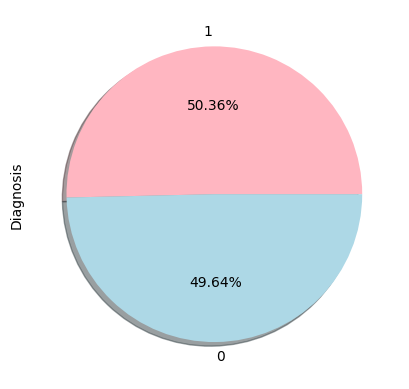

In [20]:
# Visualize ratio of target class
p=df['Diagnosis'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True,colors=color[:len(df['Diagnosis'].value_counts())])
plt.show()

## 상관관계 분석

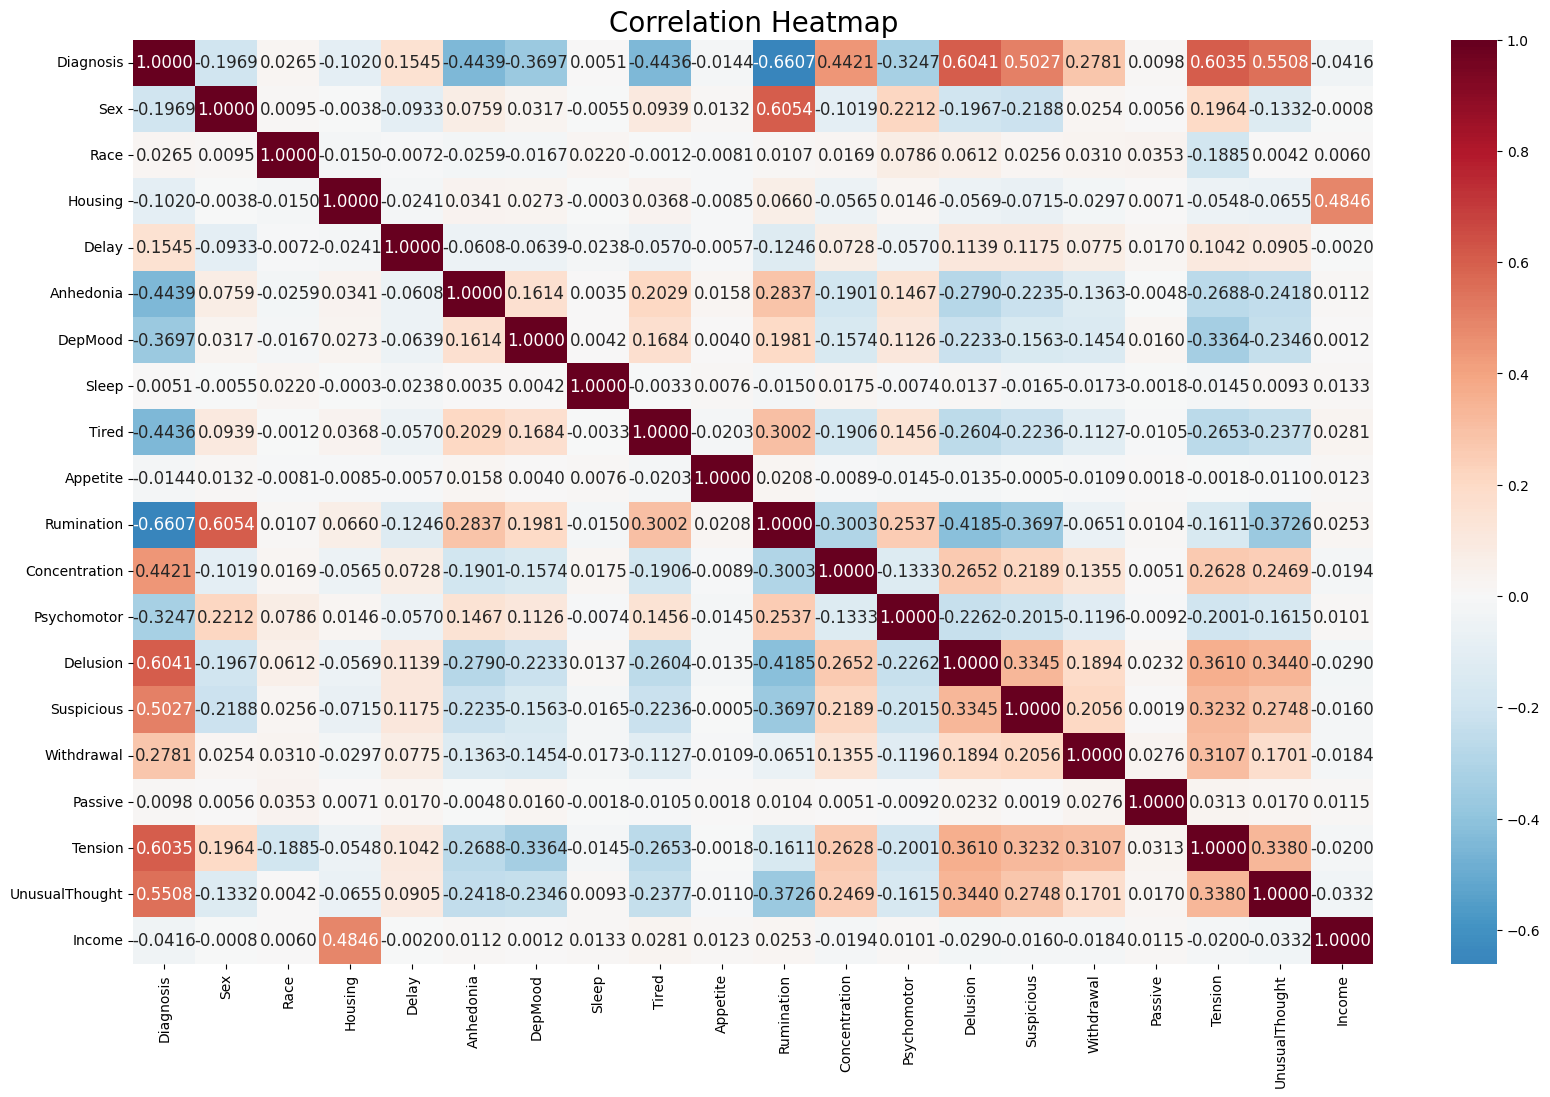

In [ ]:
# Correlation heatmap for train set
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.4f', cmap='RdBu_r', center=0, annot_kws={"fontsize":12})
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [ ]:
df.corr()

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
Diagnosis,1.000000,-0.196906,0.026488,-0.101999,0.154471,-0.443948,-0.369675,0.005139,-0.443615,-0.014447,-0.660732,0.442067,-0.324652,0.604086,0.502714,0.278118,0.009804,0.603452,0.550762,-0.041637
Sex,-0.196906,1.000000,0.009541,-0.003760,-0.093283,0.075853,0.031671,-0.005460,0.093865,0.013227,0.605359,-0.101858,0.221225,-0.196724,-0.218809,0.025418,0.005646,0.196368,-0.133153,-0.000787
Race,0.026488,0.009541,1.000000,-0.015026,-0.007208,-0.025865,-0.016731,0.021957,-0.001215,-0.008126,0.010722,0.016896,0.078643,0.061173,0.025572,0.031015,0.035262,-0.188483,0.004214,0.005972
Housing,-0.101999,-0.003760,-0.015026,1.000000,-0.024090,0.034102,0.027250,-0.000288,0.036786,-0.008546,0.065960,-0.056489,0.014577,-0.056873,-0.071526,-0.029706,0.007120,-0.054841,-0.065549,0.484558
Delay,0.154471,-0.093283,-0.007208,-0.024090,1.000000,-0.060752,-0.063878,-0.023771,-0.056971,-0.005743,-0.124551,0.072779,-0.056971,0.113937,0.117493,0.077507,0.017006,0.104187,0.090462,-0.002014
Anhedonia,-0.443948,0.075853,-0.025865,0.034102,-0.060752,1.000000,0.161364,0.003530,0.202938,0.015844,0.283677,-0.190118,0.146698,-0.279043,-0.223530,-0.136310,-0.004815,-0.268815,-0.241796,0.011227
DepMood,-0.369675,0.031671,-0.016731,0.027250,-0.063878,0.161364,1.000000,0.004213,0.168357,0.003986,0.198059,-0.157374,0.112573,-0.223257,-0.156303,-0.145439,0.016007,-0.336385,-0.234584,0.001163
Sleep,0.005139,-0.005460,0.021957,-0.000288,-0.023771,0.003530,0.004213,1.000000,-0.003298,0.007628,-0.014992,0.017481,-0.007376,0.013665,-0.016533,-0.017320,-0.001792,-0.014530,0.009330,0.013265
Tired,-0.443615,0.093865,-0.001215,0.036786,-0.056971,0.202938,0.168357,-0.003298,1.000000,-0.020323,0.300167,-0.190638,0.145553,-0.260435,-0.223639,-0.112713,-0.010533,-0.265333,-0.237699,0.028097
Appetite,-0.014447,0.013227,-0.008126,-0.008546,-0.005743,0.015844,0.003986,0.007628,-0.020323,1.000000,0.020818,-0.008896,-0.014494,-0.013524,-0.000487,-0.010850,0.001793,-0.001763,-0.011039,0.012281


상관 분석 결과 Housing과 income이 0.48로 강한 상관관계가 있는 것 같다. 두 변수에 대해 분석이 요구된다.


또, sex 변수와 Rumination 역시 강한 상관관게를 나타내고 있으며 분석이 요구된다.

## 시각화

### Correlation between Income and Housing

In [ ]:
# Income 과 Housing의 상관관계를 분석
# 분석을 위해 결측치를 제거한다.
df=df.dropna(subset=['Income'])

In [ ]:
df.loc[df.Housing == 1, ['Income']].describe()

,Income
count,9261.000000
mean,6.513619
std,2.033528
min,3.000621
25%,4.741808
50%,6.574209
75%,8.298827
max,9.999722


Housing이 1 즉 Stable 값을 가진 instance 들을 살펴보면 대략 3~6.5의 Income 값을 가지고 있음을 알 수 있다.

In [ ]:
df.loc[df.Housing == 0, ['Income']].describe()

,Income
count,538.000000
mean,1.688962
std,0.722184
min,0.502300
25%,1.081866
50%,1.631260
75%,2.298976
max,2.999501


Housing이 0 즉 Unstable 값을 가진 instance 들을 살펴보면 대략 0.5~3의 Income 값을 가지고 있음을 알 수 있다.
전체적인 관계를 확인하기 위해 시각화 해보면

<Figure size 800x500 with 0 Axes>

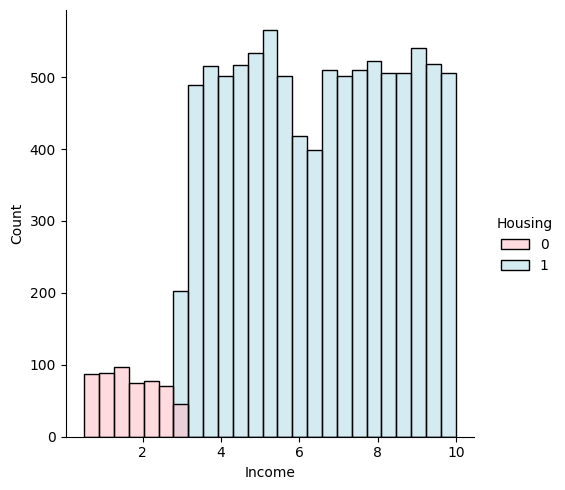

In [ ]:
# Income 값과 Housing 값의 분포를 확인
plt.figure(figsize=(8, 5))
sns.displot(df,x='Income',hue='Housing', bins=25, palette=color)

시각화 결과 특정 Income값을 경계로 Housing 변수의 값이 나누어진다는 것을 확인할 수 있다.


즉 Income 변수의 의미가 Housing 변수에 포함된다고 보여진다.


본 프로젝트에서는 타겟 변수와 상관도가 더 높은 Housing 변수만 사용한다

### Diagnosis rate by gender

Text(0.5, 1.0, 'Diagnosis rate by gender')

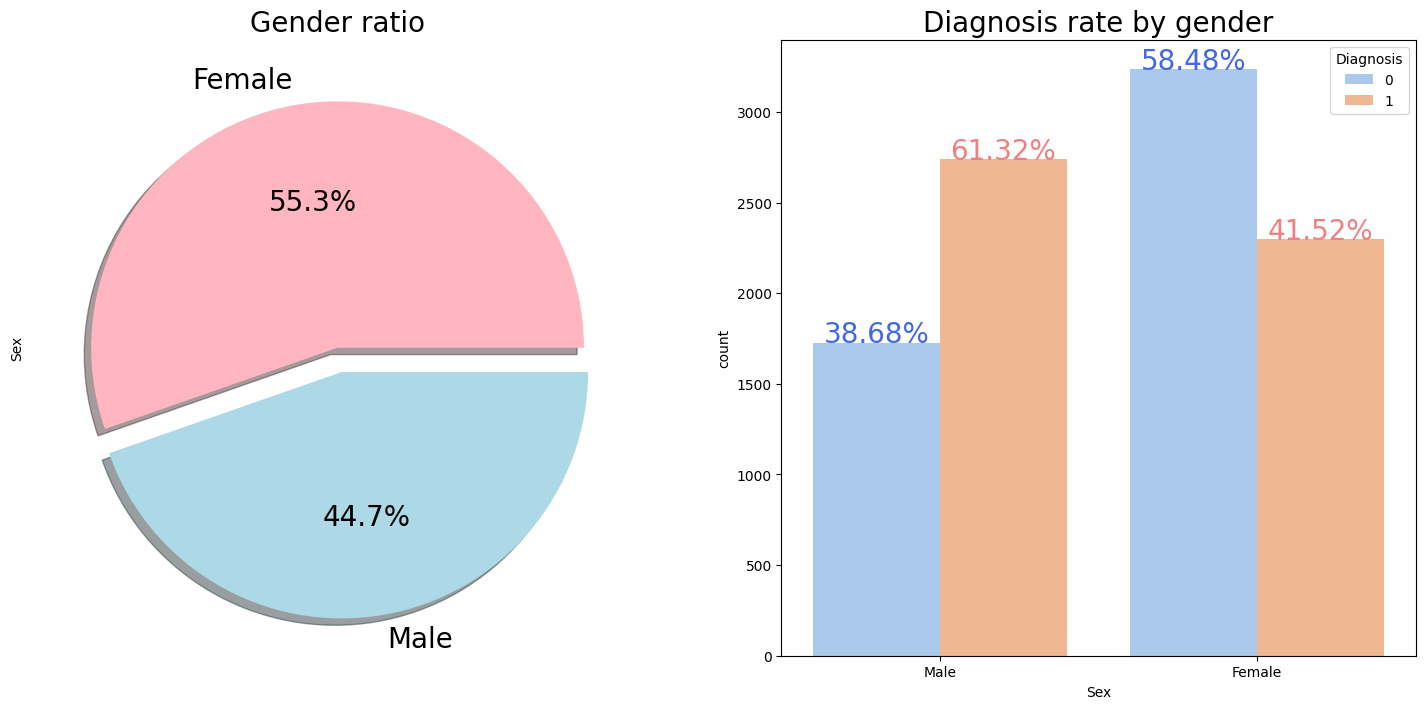

In [ ]:
# 성별 별 진단률
df=train_data.copy()
f_name='Sex'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title("Gender ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1)
cnt=0
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        if 1-int(p.get_x()+0.5) ==1:
            cnt+=1
        if cnt==2 and 1-int(p.get_x()+0.5) ==1 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[1-int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by gender",fontsize=20)

여성보다 남성이 조현병 진단률이 높다.

### Diagnosis rate by Race

Text(0.5, 1.0, 'Diagnosis rate by race')

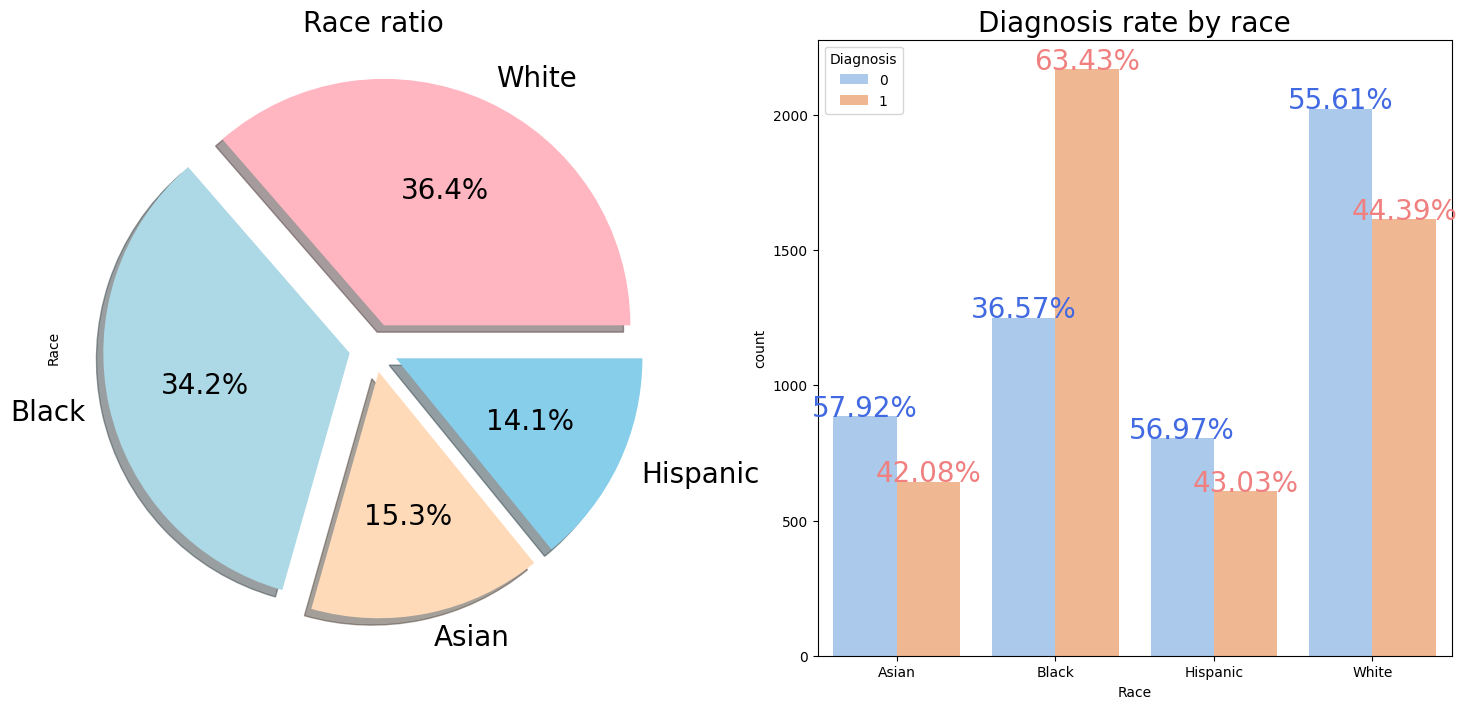

In [ ]:
# 인종 별 진단률
df=train_data.copy()
f_name='Race'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title("Race ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
cnt=0
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        if 1-int(p.get_x()+0.5) ==1:
            cnt+=1
        if cnt==2 and 1-int(p.get_x()+0.5) ==1 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by race",fontsize=20)

시각화 결과 Black 인종의 조현병 진단률이 다른 인종에 비해 높다.

인종 별 진단 률을 비교하기 위해 시각화를 진행한다.

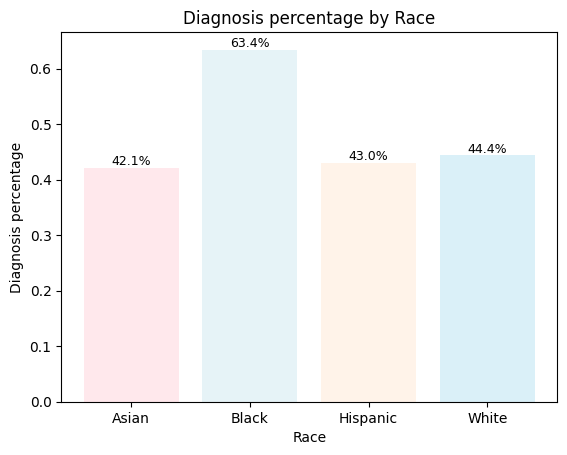

In [ ]:
colors = color[:4] ## 색상 지정
bar=plt.bar(df[['Race', 'Diagnosis']].groupby(['Race']).mean().index, df[['Race', 'Diagnosis']].groupby(['Race']).mean().values.squeeze(), color = colors, alpha = 0.3)
for rect in bar:
    height = rect.get_height()
    if height==1 or height==0:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100}%", ha='center', va='bottom', size = 8)
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height*100:.1f}%", ha='center', va='bottom', size = 9)
plt.xlabel('Race', fontsize=10)
plt.ylabel('Diagnosis percentage', fontsize=10)
plt.title('Diagnosis percentage by Race')
plt.show()

인종별 진단결과를 시각화 했을 때
다른 인종은 진단결과 1인 비율이 55-58로 퍼센트로 유사했으나
Black 인종만이 다른 세 인종과 다르게 진단결과 1의 비율이 63퍼센트로 압도적으로 높았다.


따라서 Race 변수를 인종이 Black인지 아닌지를 나타내는 파생변수인 Isblack(0 or 1 값을 가지는 Bool형 변수)으로 사용할 수 있을 것이다

### Diagnosis rate by Housing

Text(0.5, 1.0, 'Diagnosis rate by housing')

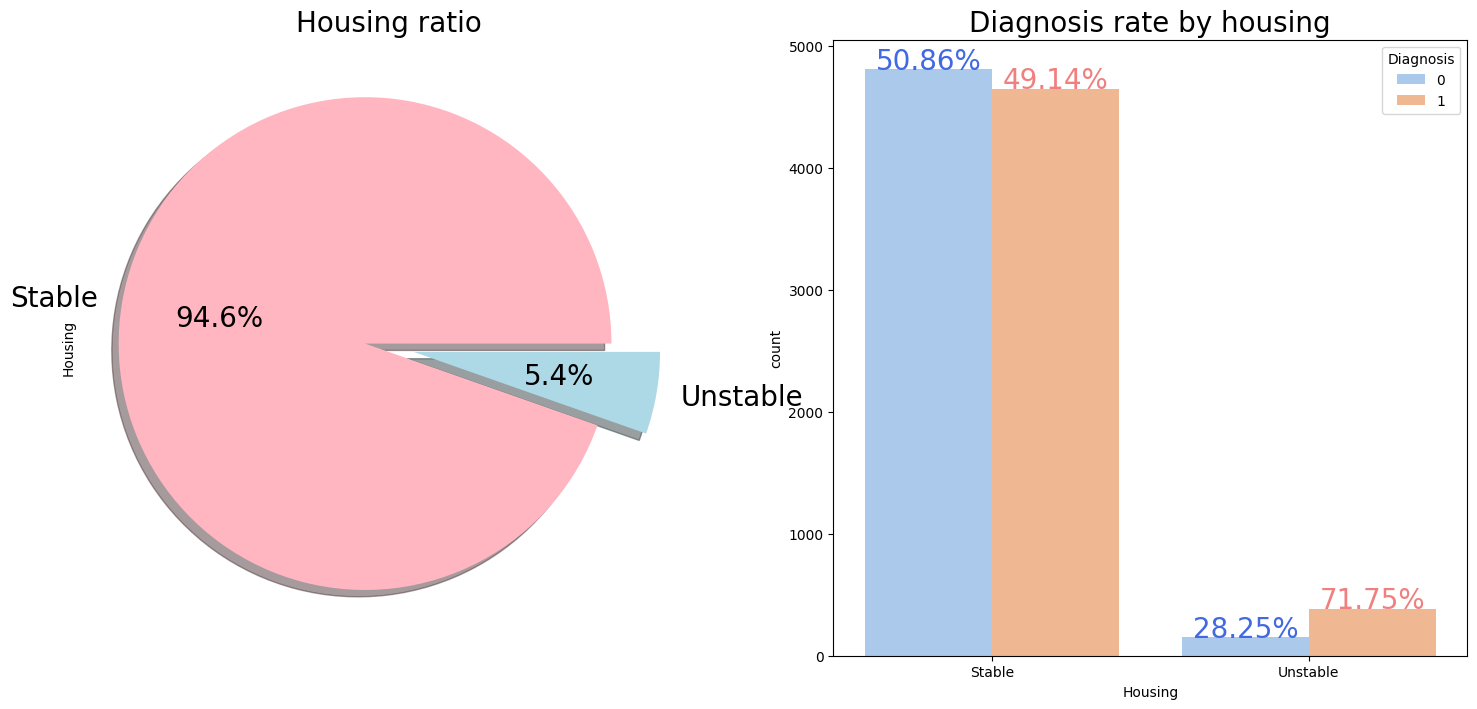

In [ ]:
# Housing 별 진단률
df=train_data.copy()
f_name='Housing'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title("Housing ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
cnt=0
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        if 1-int(p.get_x()+0.5) ==1:
            cnt+=1
        if cnt==2 and 1-int(p.get_x()+0.5) ==1 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[int(p.get_x()+0.5)]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=20)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by housing",fontsize=20)

Housing 값이 unstable 인 인스턴스의 비율은 5.4% 밖에 되지 않는다.


하지만 Housing 값이 Unstable인 인스턴스 중 조현병의 비율은 71.25%로 Stable인 인스턴스보다 높았다.


Housing 변수는 타겟변수인 Diagnosis에 영향을 주는 변수로 판단된다.

### Diagnosis rate by Anhedonia

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Anhedonia']=df['Anhedonia'].round().astype(int)

In [ ]:
df['Anhedonia'].value_counts()

6     3224
7     3039
5     1536
8     1488
4      330
9      329
10      29
3       24
2        1
Name: Anhedonia, dtype: int64

In [ ]:
a=[0.1 for _ in range(len(df[f_name].value_counts()))]
print(a)

[0.1, 0.1]


Text(0.5, 1.0, 'Diagnosis rate by Anhedonia')

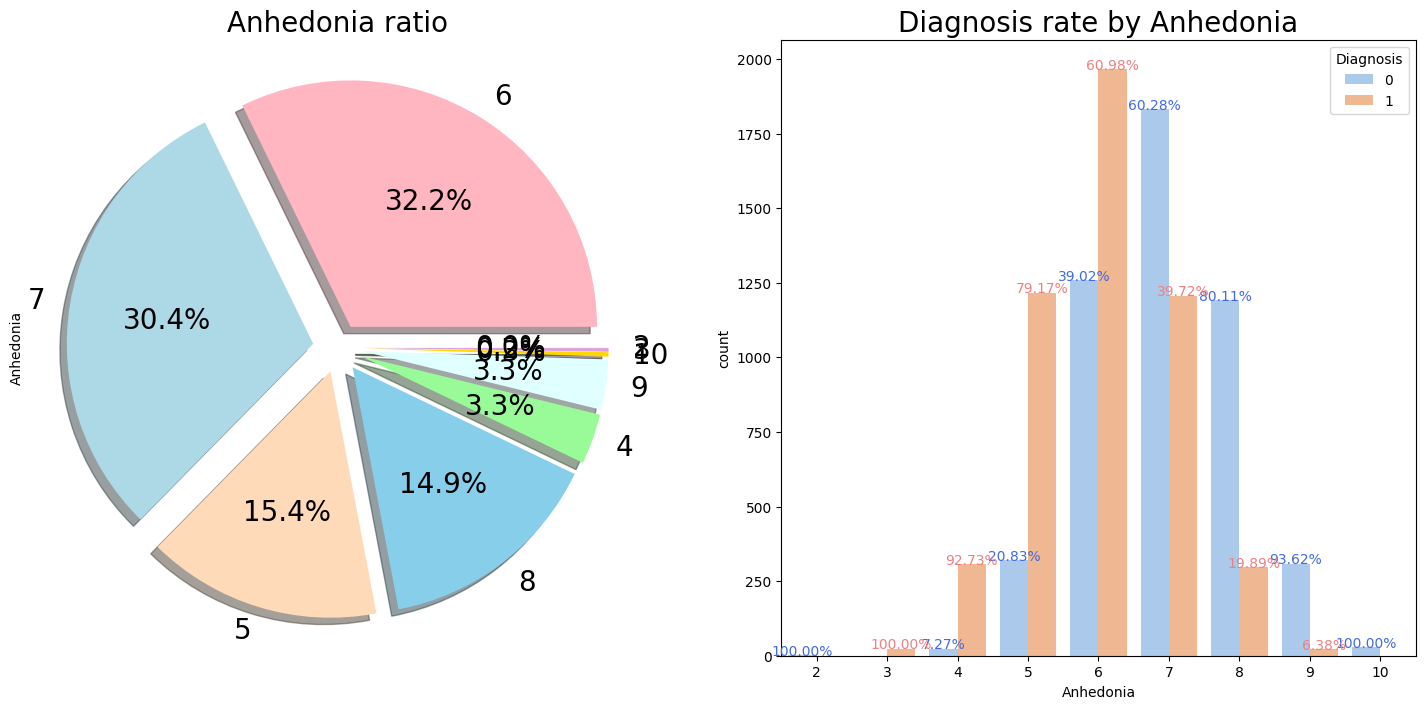

In [ ]:
# Anhedonia 별 진단률
f_name='Anhedonia'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx ==3 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Anhedonia 값이 높을 수록 정동장애 환자의 비율이 증가함

예상되는 이유로는 Anhedonia는 무쾌감증이라는 의미인데 이는 Emotional하므로 조현병 보다는 정동장애 증상에 가깝다는 것이다.

### Diagnosis rate by Depmood

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['DepMood']=df['DepMood'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by DepMood')

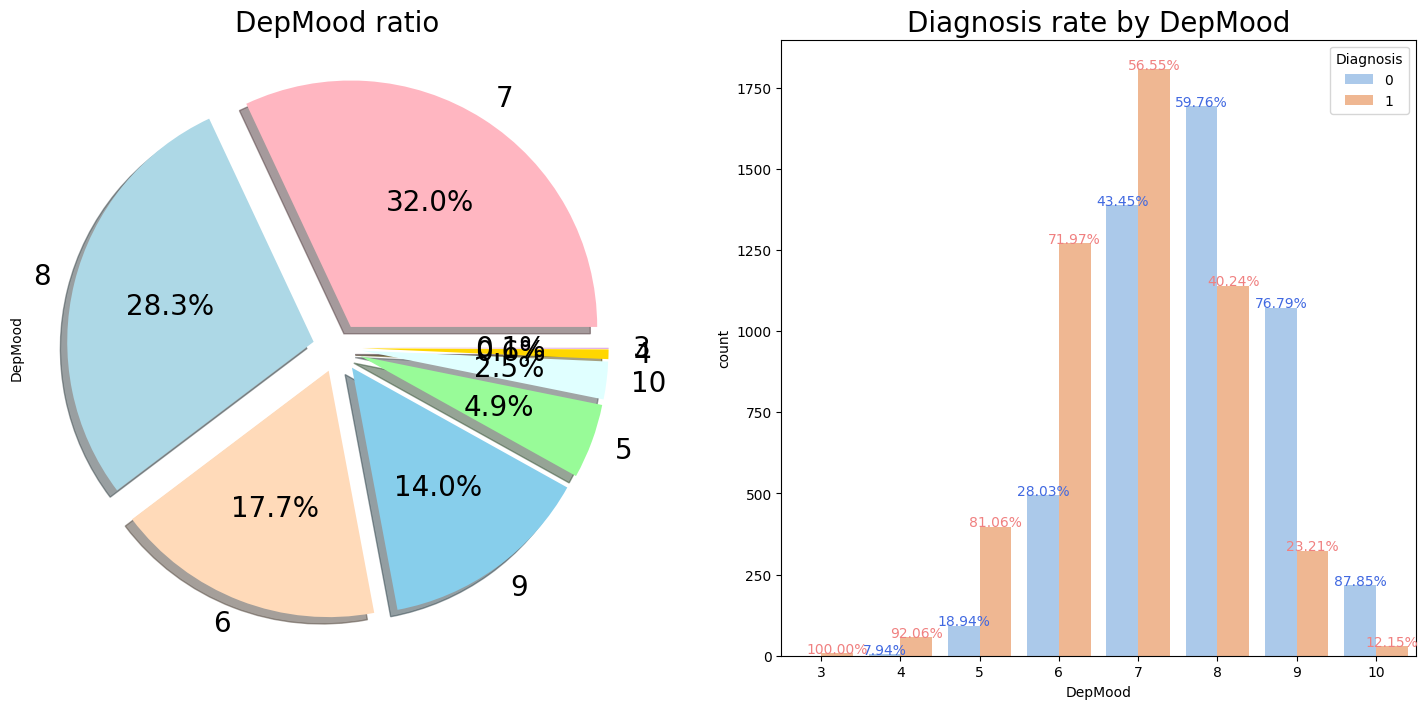

In [ ]:
# Depmood 별 진단률
f_name='DepMood'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx ==3 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

우울한 상태를 나타내는 수치가 높아질수록 정동장애 환자의 비율이 증가함


Anhedonia와 마찬가지로 DepMood는 Emotional 하기 때문에 조현병 보다 정동장애의 증상에 가까울 것이다.

### Diagnosis rate by Sleep

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Sleep']=df['Sleep'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Sleep')

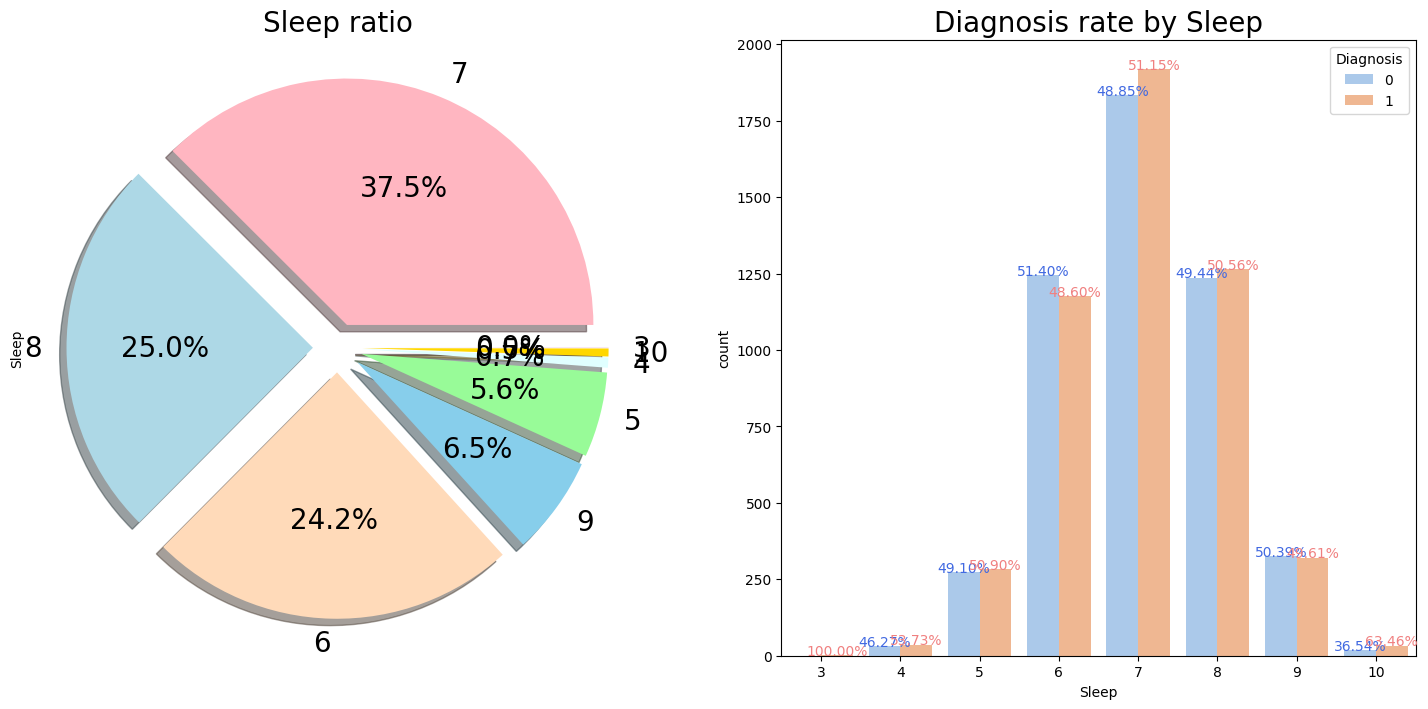

In [ ]:
# Sleep 별 진단률
f_name='Sleep'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx ==3 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

수면 시간은 Diagnosis에 영향을 미치지 않는 것 같다.

수면 시간과 상관 없이 사람 개개인 마다 느끼는 피로도가 다르다고 생각한다.

따라서 Tired 변수는 Sleep변수와 다르게 Diagnosis에 영향을 미칠 것이라 생각한다.

### Diagnosis rate by Tired

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Tired']=df['Tired'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Tired')

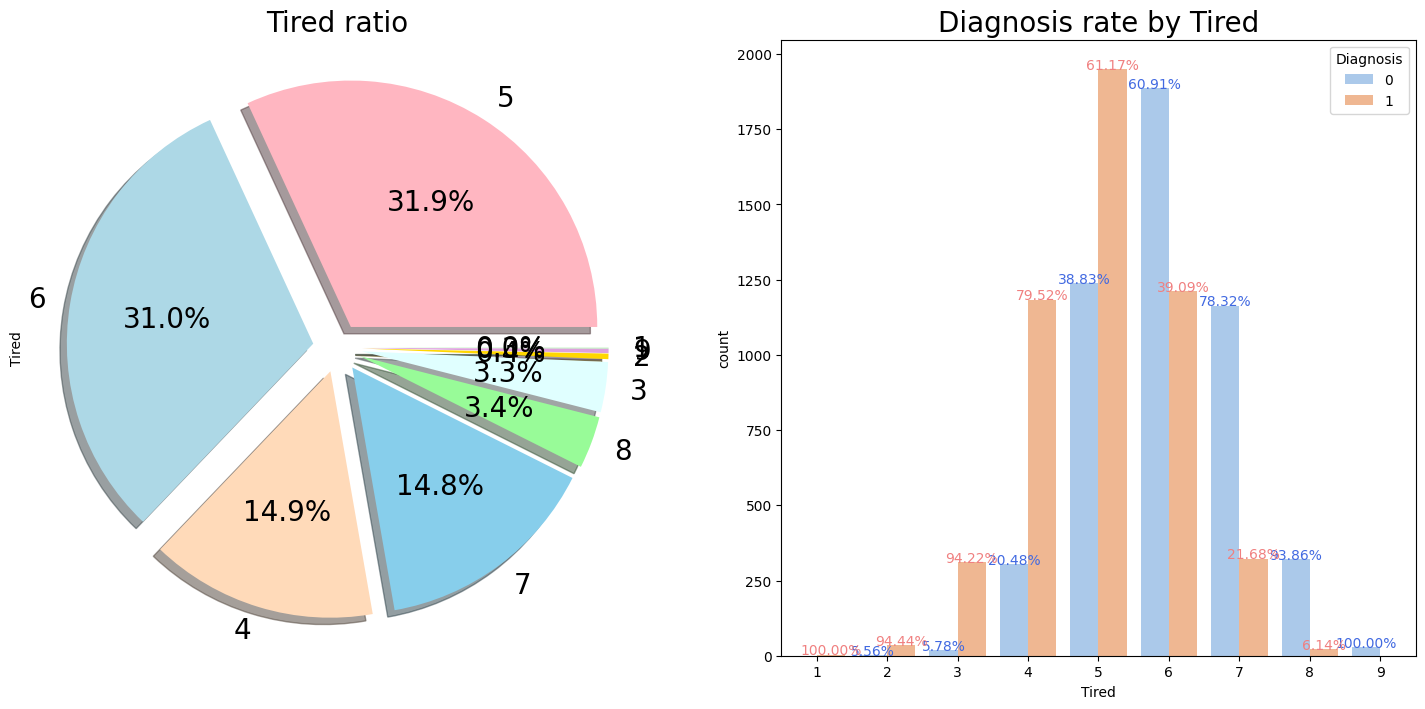

In [ ]:
# Sleep 별 진단률
f_name='Tired'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx ==1 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Sleep 변수와 달리 Tired 변수는 Diagnosis에 큰 영향을 미치는 것 같다.

그런데 Tired 변수 의미상 Tired 값이 클 수록 느끼는 피곤함이 크다는 의미로 Diagnosis 가 1인 비율이 높을 것이라고 예상했으나 그 반대의 결과가 나왔다.

우리가 파악하고 있는 Tired변수의 의미와 다른 것인지, 피곤할 수록 편집증일 확률이 적어지는 것인지 정확히 파악은 되지 않는다.

예상대로 sleep time 변수와 Tired는 상관이 없는 것 같다.

모델 학습에 Sleep time은 사용하지 않아야 할 것 같다.

<Figure size 800x500 with 0 Axes>

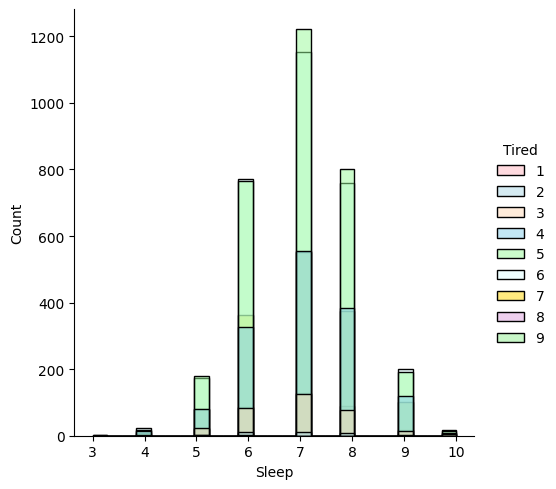

In [ ]:
# Income 값과 Housing 값의 분포를 알아보자
plt.figure(figsize=(8, 5))
sns.displot(df,x='Sleep',hue='Tired', bins=25,palette=color)

Sleep과 Tired가 관계가 없는 것을 시각적으로 보기 위해 시각화를 해보았다.

sleep시간에 관계없이 Tired가 골고루 퍼져있다.

### Diagnosis rate by Appetite

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Appetite']=df['Appetite'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Appetite')

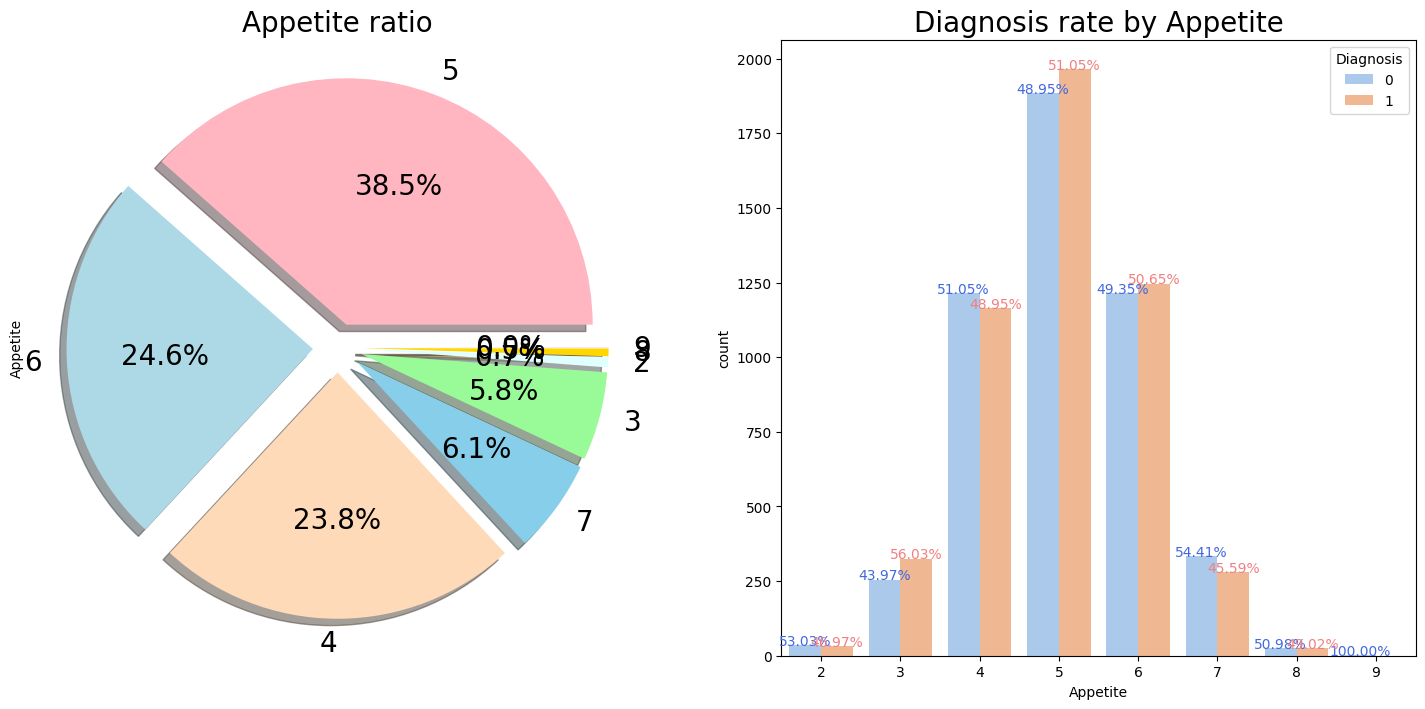

In [ ]:
# Appetite 별 진단률
f_name='Appetite'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==2:
            cnt+=1
        if idx ==2 and cnt==2 :
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

상관계수에서도 확인할 수 있듯이 Appetite는 진단률에 영향이 없다고 판단된다.

Appetite의 값이 달라짐에도 Dignosis의 비율이 50:50 에 가깝다.

상관 계수 분석에서도 Appetite는 Diagnosis에 영향을 미치지 않을 것이라고 예상 되었었는데 시각화 결과 역시 마찬가지이다.

모델 학습에 Appetite 변수는 사용하지 않을 것 같다.

### Diagnosis rate by Rumination

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Rumination']=df['Rumination'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Rumination')

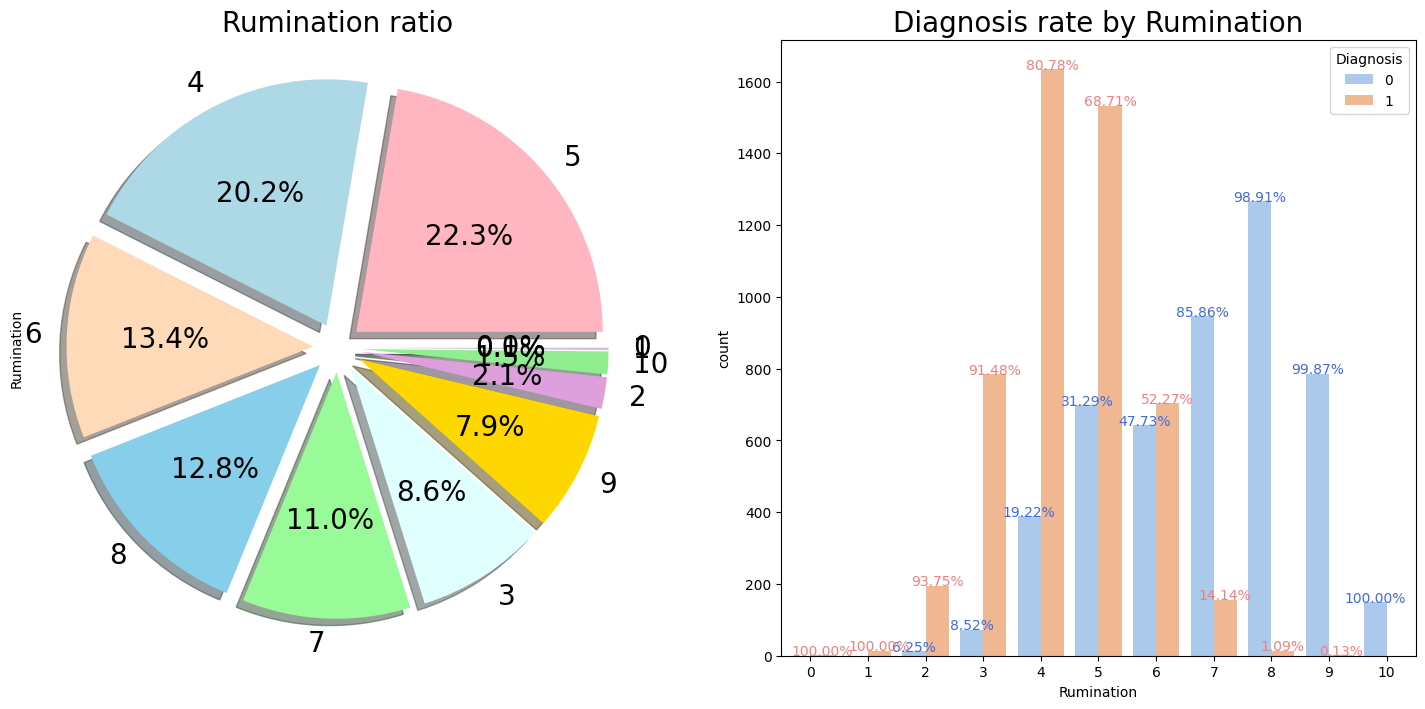

In [ ]:
# Rumination 별 진단률
f_name='Rumination'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx ==0:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

분석 결과 Runination이 높을 수록 Diagnosis의 비율이 낮아지는 것을 확인할 수 있다.


즉 Rumination 값이 높을 수록 조현병일 확률이 낮아진다는 것이다.


상관계수 결과와 시각화 결과를 미루어 봤을 때 Rumination은 조현병을 진단하는 데 중요한 변수 이다.

### Diagnosis rate by Concentration

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Concentration']=df['Concentration'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Concentration')

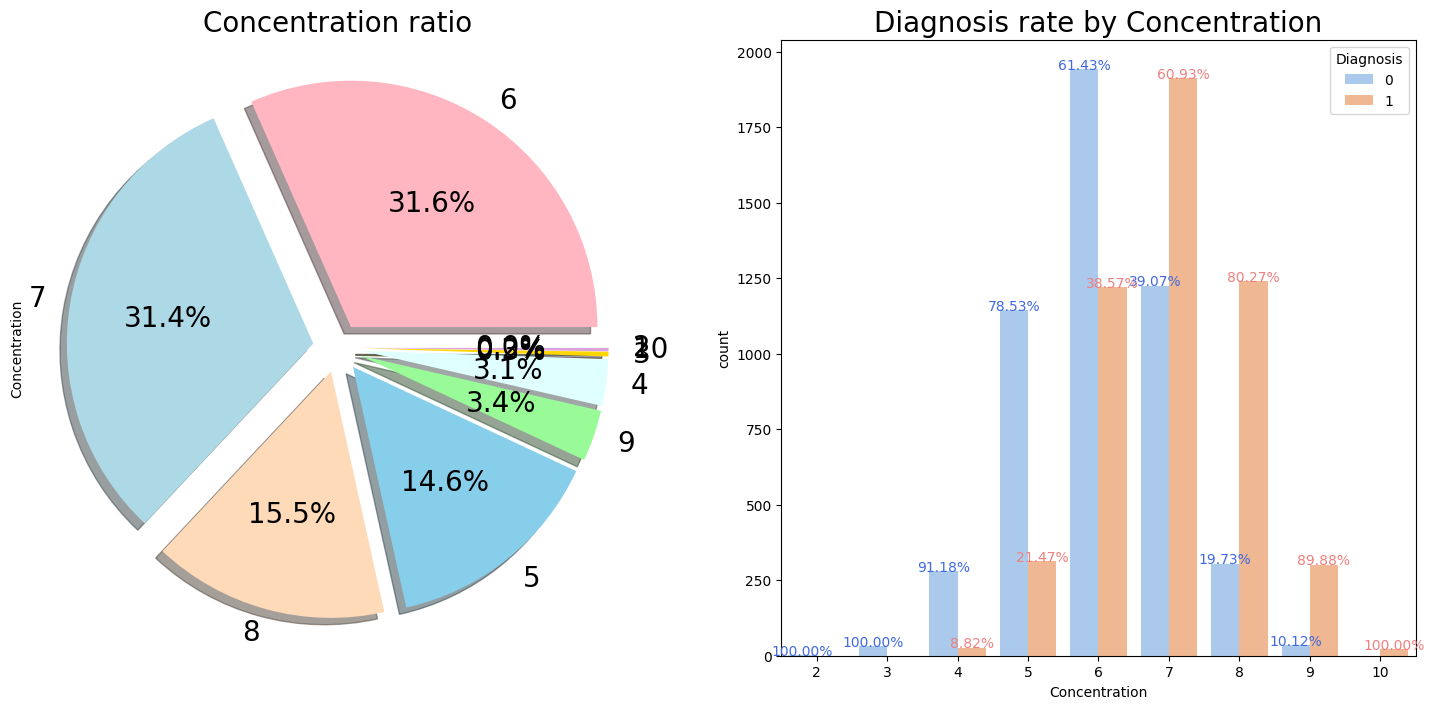

In [ ]:
# Concentration 별 진단률
f_name='Concentration'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==4:
            cnt+=1
        if idx ==4 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Concentration 값이 높아질수록 진단률이 높아진다.

이로 보아 원래 판단했던 '집중력'이 아닌 '집중력 장애'라는 의미의 변수인 것 같다. Concectration은 진단률에 큰 영향을 미친다.

### Diagnosis rate by Psychomotor

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Psychomotor']=df['Psychomotor'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Psychomotor')

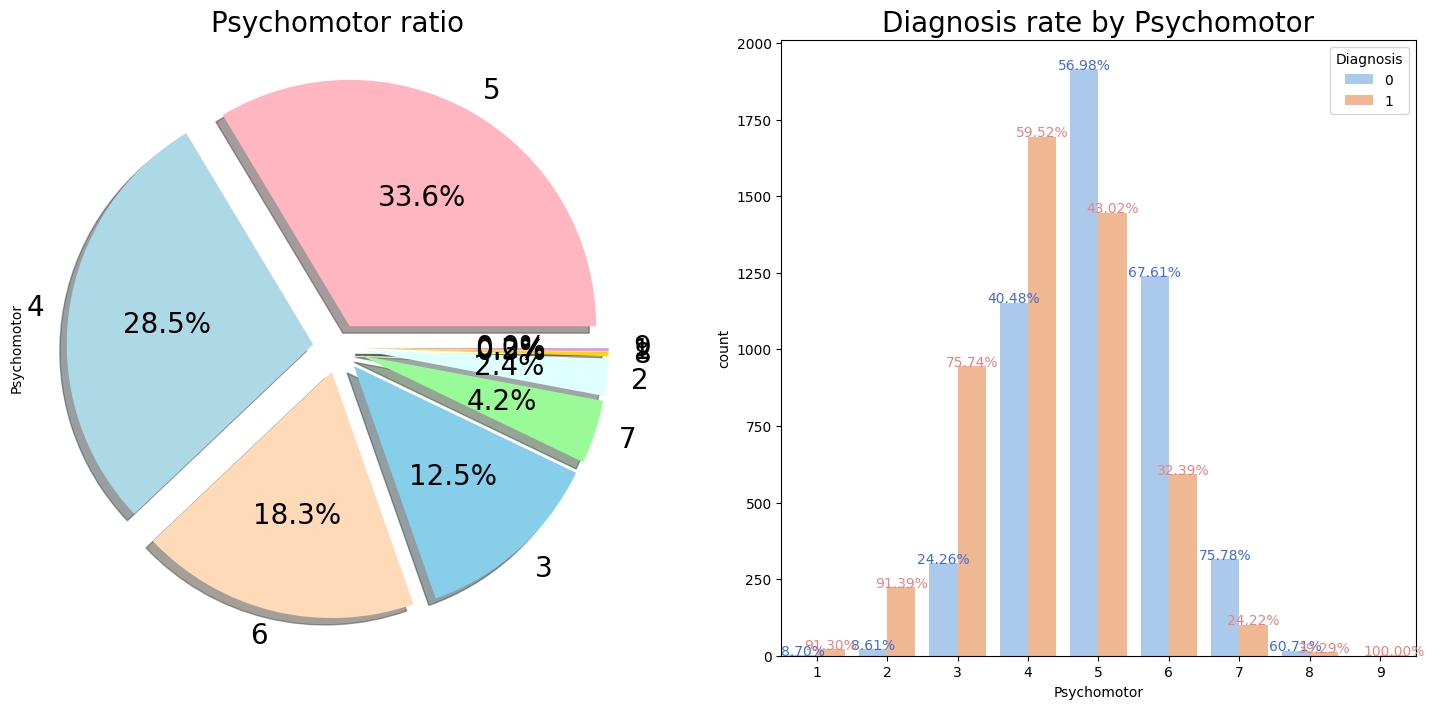

In [ ]:
# Psychomotor 별 진단률
f_name='Psychomotor'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

psychomotor가 높을 수록 진단률이 낮아진다.

psychomotor는 조현병보다 정동장애 증상과 관련이 있는 것 같다.

Psychomotor가 9일 때 진단률이 100퍼센트인데 이는 Psychomotor가 9인 환자가 1명이라서 그런 것 같다.

In [ ]:
# 이상치 데이터 확
df[df['Psychomotor'] == 9]

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income
2298,1,Female,White,Stable,Yes,6,7,7,5,5,4,7,9,4.418097,4.106844,2.556898,4.318197,6.829843,3.98998,9.791014


데이터의 다른 변수 값도 확인 한 결과 이상치로 판단하여 삭제해도 될 것 같다.

### Diagnosis rate by Delusion

In [ ]:
# 분석을 위해 결측치 제거 및 값을 범주화(반올림)
name='Delusion'
df2=df.copy()
df2=df2.dropna(subset=[name])
df2['Delusion']=df2['Delusion'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Delusion')

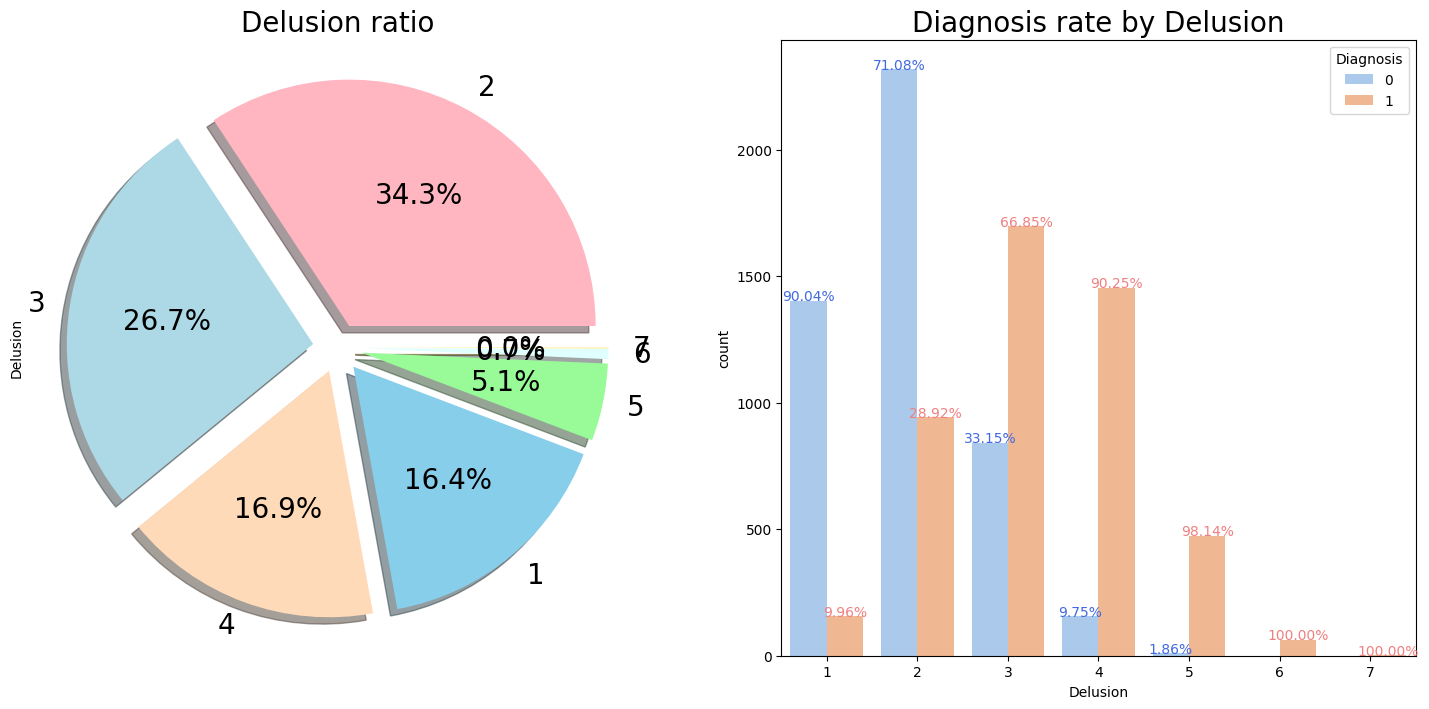

In [ ]:
# Delusion 별 진단률
f_name='Delusion'
g_color=color[:len(df2[f_name].value_counts())]
ct_sex = pd.crosstab(df2[f_name], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df2[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Delusion 높을수록 조현병 진단확률 상승

Delusion > 6이면 모든 진단이 1임을 발견함

Delusion이 조현병 진단 시 큰 영향을 주는 변수로 분석할 수 있다.

### Diagnosis rate by Suspicious

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Suspicious']=df['Suspicious'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Suspicious')

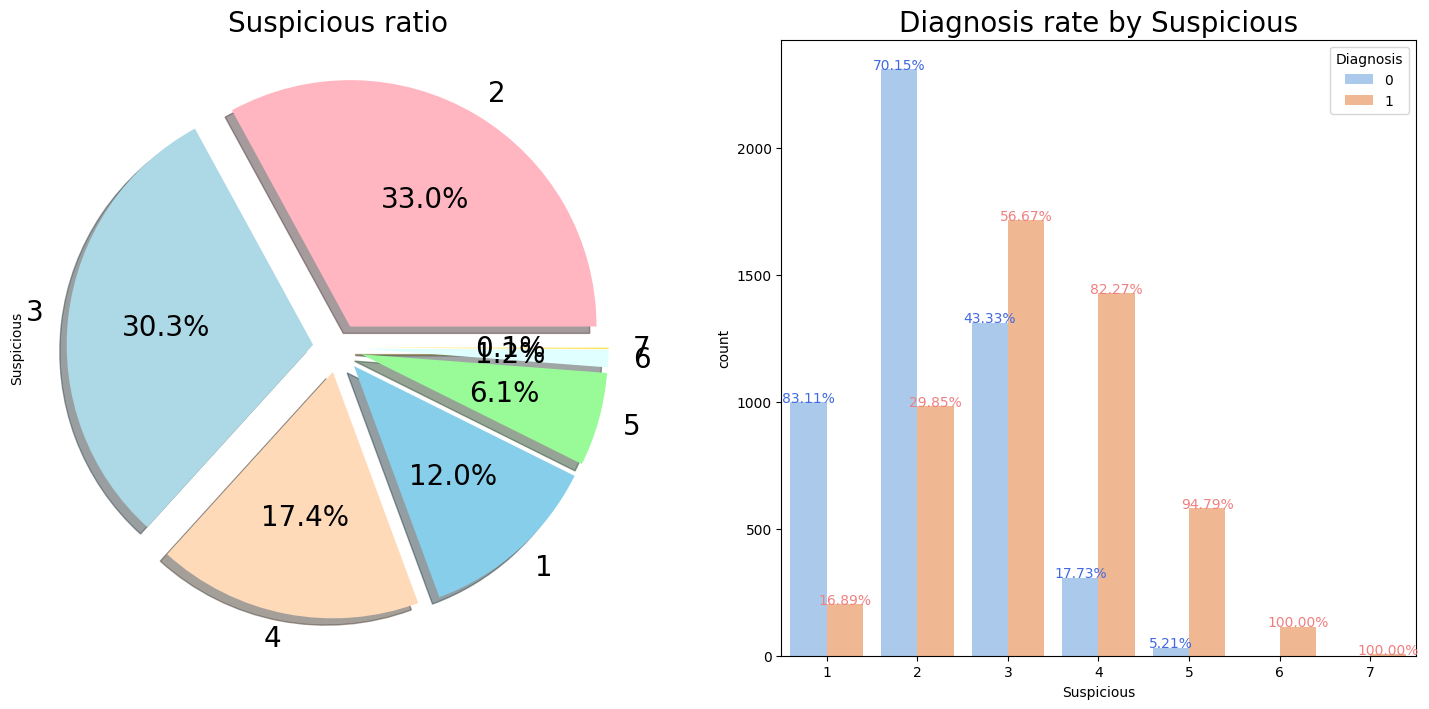

In [ ]:
# Suspicious 별 진단률
f_name='Suspicious'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Suspicious 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.

Suspicious는 Diagnosis에 크게 영향을 미치는 것 같다.

### Diagnosis rate by Withdrawal

In [ ]:
# 분석을 위해 결측치 제거 및 값을 범주화(반올림)
name='Withdrawal'
df2=df.copy()
df2=df2.dropna(subset=[name])
df2['Withdrawal']=df2['Withdrawal'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Withdrawal')

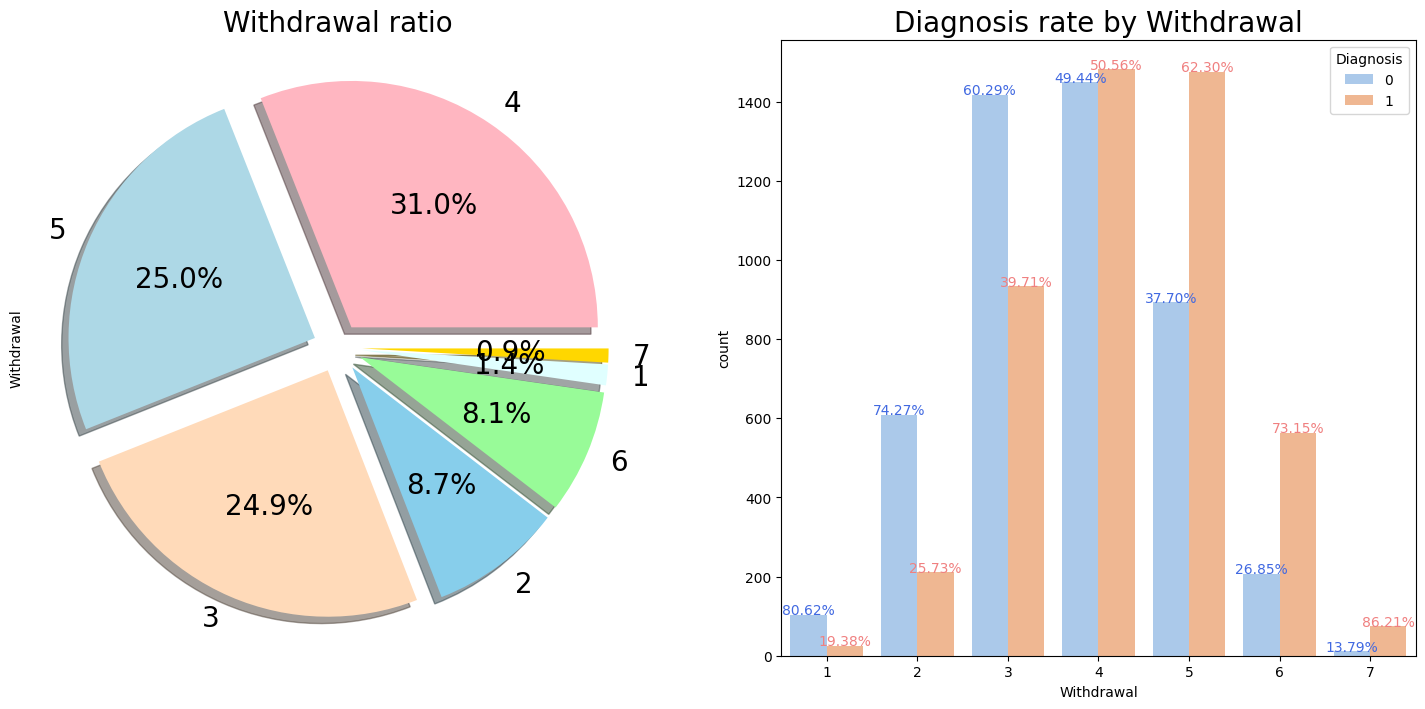

In [ ]:
# Withdrawal 별 진단률
f_name='Withdrawal'
g_color=color[:len(df2[f_name].value_counts())]
ct_sex = pd.crosstab(df2[f_name], df2['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df2[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df2[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df2, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Withdrawal 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.

### Diagnosis rate by Passive

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Passive']=df['Passive'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Passive')

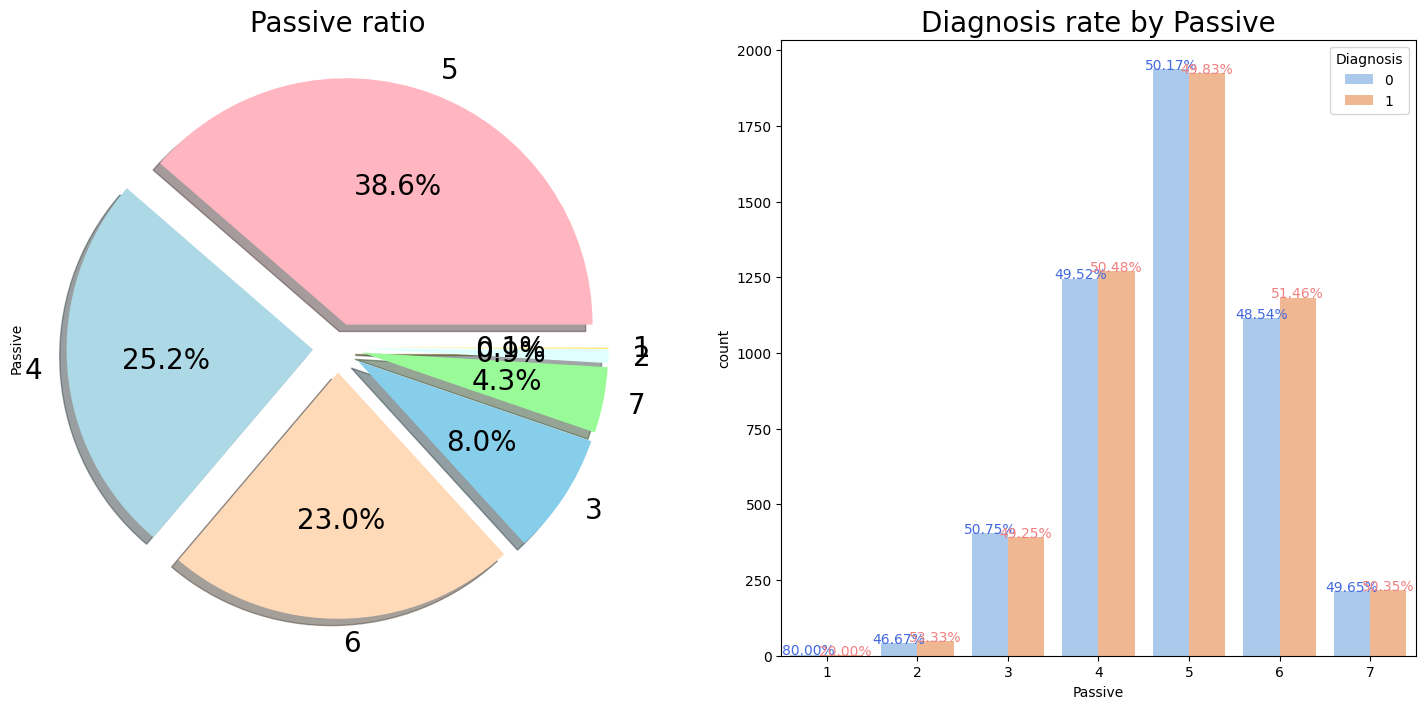

In [ ]:
# Passive 별 진단률
f_name='Passive'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Passive는 진단률에 영향을 미치지 않는다.

편집증과 관련 없이 그저 사람의 성격을 드러내는 변수인 것 같다.

### Diagnosis rate by Tension

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['Tension']=df['Tension'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by Tension')

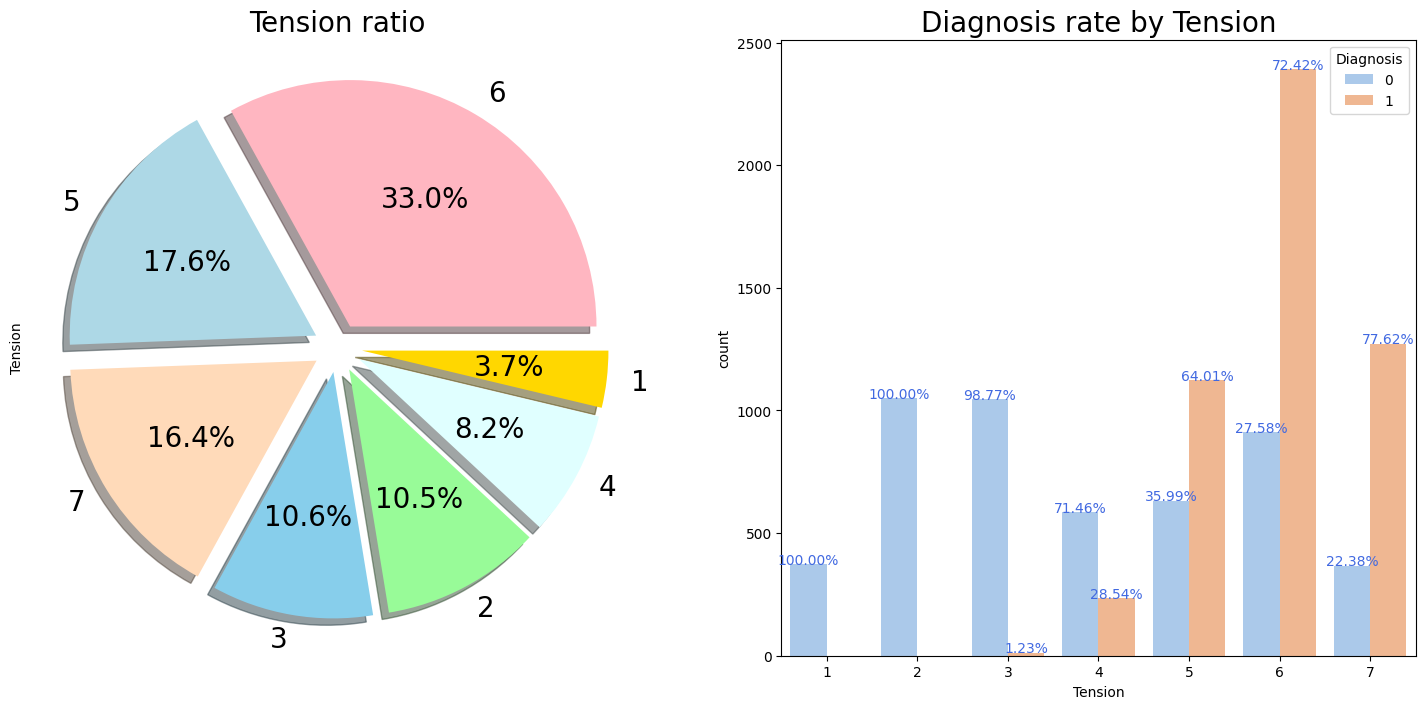

In [ ]:
# Tension 별 진단률
f_name='Tension'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

Tension 수치가 높을 수록 조현병의 진단률이 높아진다.
Tension 역시 조현병을 진단하는 데 중요한 변수로 판단된다.

### Diagnosis rate by Unusal_thought

In [ ]:
# 분석을 위해 값을 범주화(반올림)
df['UnusualThought']=df['UnusualThought'].round().astype(int)

Text(0.5, 1.0, 'Diagnosis rate by UnusualThought')

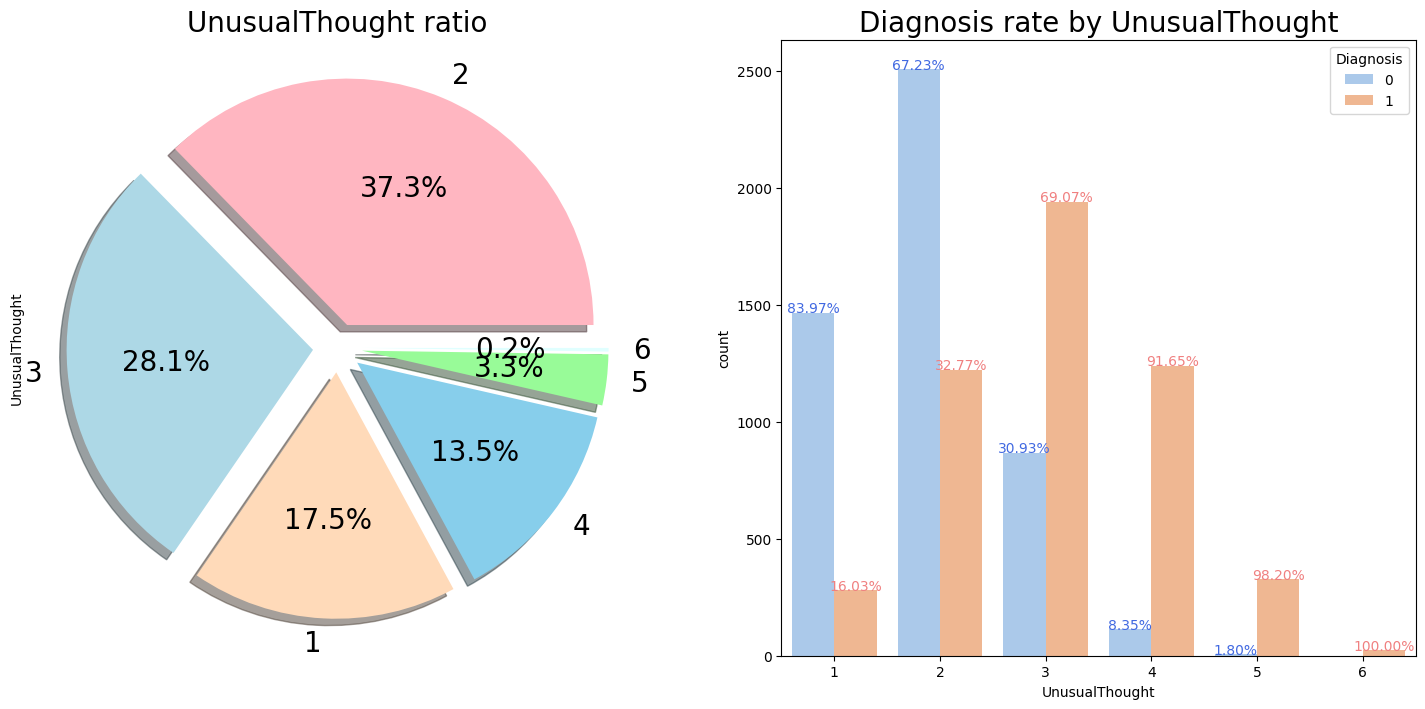

In [ ]:
# Unusal_thought 별 진단률
f_name='UnusualThought'
g_color=color[:len(df[f_name].value_counts())]
ct_sex = pd.crosstab(df[f_name], df['Diagnosis'])
sum_ct = ct_sex.sum(axis=1)
idx_ct = sum_ct.index
f, ax = plt.subplots(1, 2, figsize = (18, 8))
p=df[f_name].value_counts().plot.pie(explode=[0.1 for _ in range(len(df[f_name].value_counts()))], autopct='%1.1f%%',ax=ax[0], shadow=True,colors=g_color,fontsize=20)
p.set_title(f_name+" ratio",fontsize=20)
color_list=['royalblue','lightcoral']
palette1=sns.color_palette('pastel',2)
p2=sns.countplot(x=f_name, hue = 'Diagnosis', data = df, ax=ax[1],palette=palette1,order=sum_ct.index)
color_idx=0
cnt=0
for p in ax[1].patches:
    if p.get_y() + p.get_height()!=0:
        idx=int(p.get_x()+0.5)
        idx=idx_ct[idx]
        if idx==1:
            cnt+=1
        if idx ==1 and cnt==2:
            color_idx+=1
        ax[1].text(p.get_x() + (p.get_width()/2) ,
                p.get_y() + p.get_height(),
                f"{p.get_height()/sum_ct[idx]*100:.2f}%",     # 퍼센트표시
                ha = 'center' ,
                color = color_list[color_idx],
                fontsize=10)   # 좌우정렬 중간
p2.set_title("Diagnosis rate by "+f_name,fontsize=20)

UnusualThought 가 높아질 수록 진단률이 증가하는 것이 확실하게 보인다.

UnusualThought도 조현병을 진단하는 데 중요한 변수로 판단된다.

# 파생변수
시각화 결과 Race 컬럼 Black의 Diagnosis의 비율이 높다는 것으로 판단이 된다.  
Is_Black이라는 컬럼 생성 => (Asian, Hispanic, White : 0), (Black : 1)

In [38]:
df['Is_Black'] = df['Race']
#test_data['Is_Black'] = test_data['Is_Black']

black = [2]
non_black = [0, 1, 3]

for each in black:
    df['Is_Black'] = df['Is_Black'].replace(each, '1')
    #test_data['Is_Black'] = test_data['Is_Black'].replace(each, '1')

for each in non_black:
    df['Is_Black'] = df['Is_Black'].replace(each, '0')
    #test_data['Is_Black'] = test_data['Is_Black'].replace(each, '0')

In [39]:
df.head(10)

,Diagnosis,Sex,Race,Housing,Delay,Anhedonia,DepMood,Sleep,Tired,Appetite,...,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Passive,Tension,UnusualThought,Income,Is_Black
0,1,0,0,1,0,5.776834,7.945197,6.538275,5.821416,5.589637,...,5.843773,3.682413,3.544660,1.396333,4.292102,5.820395,6.763654,1.165049,8.730176,0
1,0,0,1,1,0,7.298161,8.605159,5.386226,6.657438,6.115384,...,6.033697,5.381531,2.077573,2.520095,2.950640,4.904143,3.009537,1.635291,4.675389,0
2,1,1,2,0,0,5.478631,6.581001,7.314665,5.759076,4.096647,...,7.184592,5.588698,3.076944,1.552275,5.364331,5.332242,6.689860,3.030685,0.750534,1
3,0,1,2,1,1,7.440324,6.482757,7.519543,5.483178,5.532212,...,6.172174,6.222733,3.657648,2.413774,NaN,3.874793,6.749632,1.548987,4.812903,1
4,1,0,3,1,1,7.655051,6.159573,7.658879,5.310127,5.067152,...,8.724369,4.631259,3.452163,4.862946,3.967482,3.537156,6.034795,3.502844,8.012474,0
5,1,0,3,1,0,6.792071,7.356555,6.357645,5.632825,5.465320,...,7.524505,5.409327,1.955426,5.325726,3.520632,4.101719,6.984951,2.663967,7.827365,0
6,1,1,0,1,1,6.041251,6.184474,6.312660,4.117508,4.662996,...,5.547408,4.701880,2.644587,5.125349,3.480147,4.695503,6.034624,3.291693,9.874306,0
7,1,0,2,1,1,5.001452,7.278523,6.151661,6.016339,4.568768,...,6.701939,4.652116,NaN,4.560056,6.015425,3.010023,6.584751,4.304365,6.954237,1
8,0,1,3,1,1,7.163288,6.916091,6.758331,7.739223,5.880779,...,6.278096,7.160140,1.136367,2.032391,3.399834,3.678778,3.823287,2.074402,3.736413,0
9,0,0,2,1,0,7.064150,8.652332,7.161443,6.515413,3.234756,...,5.280656,5.175847,1.300076,1.307988,1.420812,4.814137,1.399222,1.587281,4.565128,1


In [40]:
df.drop(columns = ['Race'], inplace = True)
df.drop(columns = ['Sleep'], inplace = True)
df.drop(columns = ['Appetite'], inplace = True)
df.drop(columns = ['Passive'], inplace = True)

In [41]:
df.head()

,Diagnosis,Sex,Housing,Delay,Anhedonia,DepMood,Tired,Rumination,Concentration,Psychomotor,Delusion,Suspicious,Withdrawal,Tension,UnusualThought,Income,Is_Black
0,1,0,1,0,5.776834,7.945197,5.821416,5.990781,5.843773,3.682413,3.544660,1.396333,4.292102,6.763654,1.165049,8.730176,0
1,0,0,1,0,7.298161,8.605159,6.657438,4.740278,6.033697,5.381531,2.077573,2.520095,2.950640,3.009537,1.635291,4.675389,0
2,1,1,0,0,5.478631,6.581001,5.759076,4.004291,7.184592,5.588698,3.076944,1.552275,5.364331,6.689860,3.030685,0.750534,1
3,0,1,1,1,7.440324,6.482757,5.483178,7.980671,6.172174,6.222733,3.657648,2.413774,NaN,6.749632,1.548987,4.812903,1
4,1,0,1,1,7.655051,6.159573,5.310127,3.445936,8.724369,4.631259,3.452163,4.862946,3.967482,6.034795,3.502844,8.012474,0


## 정신쪽과 관련있을 것 같은 변수들을 통한 파생변수  
Delusion => 상관계수가 0.6으로 관계성이 높음, 높은 값이 Diagnosis 1을 나타냄  
Rumination => 남성이 여성에 비해 낮고, 대체적으로 낮은 값은 Diagnosis 1을 나타냄  
Unusual_Thought => 남성이 여성에 비해 높고, 대체적으로 높은 값은 Diagnosis 1을 나타냄
아래와 같은 공식을 만들어 보았음  

In [42]:
df['Psych_Stress'] = (df['Delusion'] + df['UnusualThought'] -  df['Rumination'])
df['Psych_Stress'] = df['Psych_Stress'].round(1)


b = df.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
b.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

데이터 시각화 및 분석 결과 Psy_Stress가 여성과 남성에서의 차이도 있다고 느껴 성별에 따라 분리하여 분석해보았다.

In [43]:
male_diagnosis = df[df['Sex'] == 1]
female_diagnosis = df[df['Sex'] == 0]

In [44]:
c = male_diagnosis.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
c.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

KeyError: 'Psych_Stress'

In [ ]:
d = female_diagnosis.groupby(['Psych_Stress','Diagnosis'])['Diagnosis'].count().unstack('Diagnosis')
d.plot(kind = 'bar')
plt.title('Psych_Stress')
plt.show()

**결과 : 예상과 같이 둘다 분리는 잘 되었지만 남성쪽이 더 잘 구분되는 것 같음**